In [2]:
#import libraries and packages
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [3]:
#import data and select feature list
insta = pd.read_excel("Instagram_dataset.xlsx", sheet_name='Sheet1')
insta=insta[['followers','likes','views','comments','estimated impact anna']]

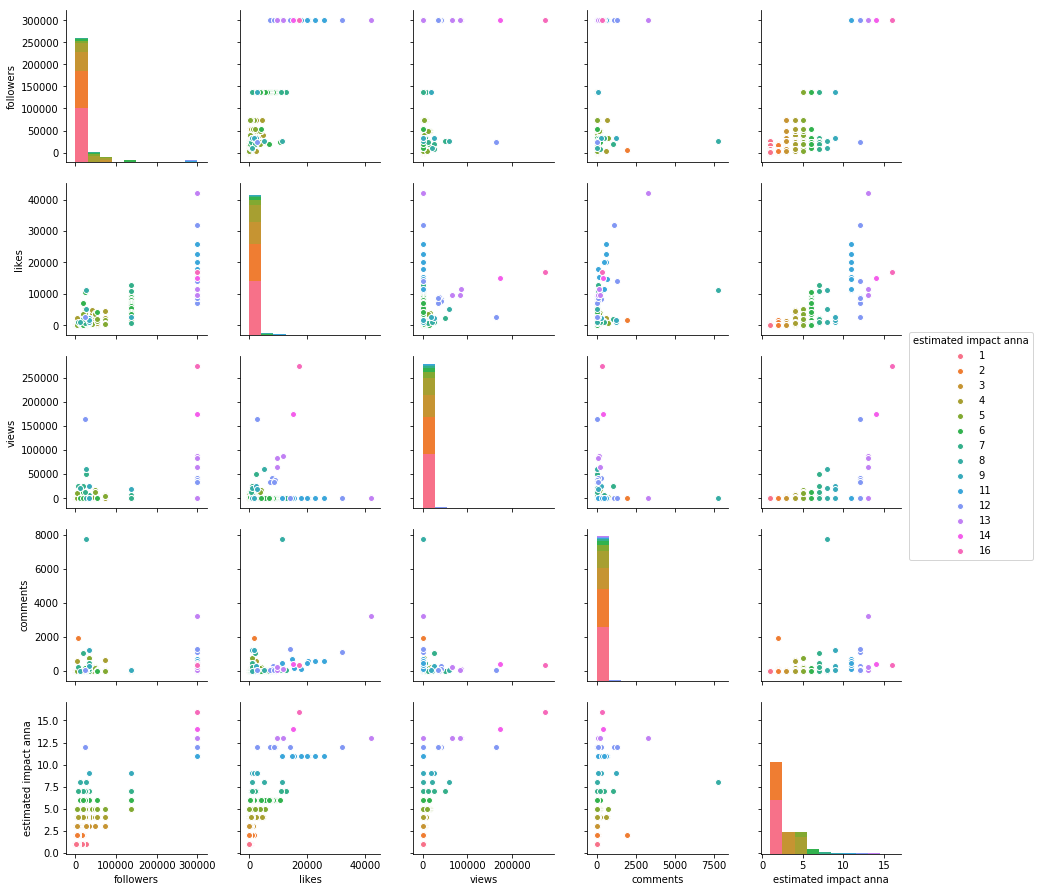

In [5]:
#create pairplot of the feature variables
sns.pairplot(insta, hue='estimated impact anna')

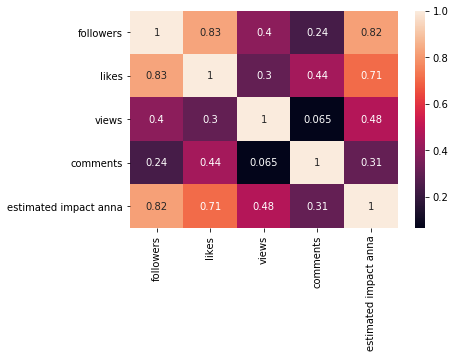

In [6]:
#create correlation plot
sns.heatmap(insta.corr(), annot = True)

In [7]:
#feature engineering
insta[['views']] = np.nan_to_num(insta[['views']])
X = insta.drop('estimated impact anna', axis=1)
X = X.apply(preprocessing.scale, axis=0)
y = insta['estimated impact anna'].values
y_cat = to_categorical(y)

C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

In [8]:
#NN Model
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state= 123)

In [ ]:
#--------------------------------------------Grid Search Hyperparameters Tuning --------------------------------------------------#
#Epoch tuning
def create_model():
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model)

epochs = [500, 1000, 1500, 3000]
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #1000

#Optimizer tuning
def create_model(optimizer='adam'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, epochs = 1500)

optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #Adam

#Learning Rate, Momentum tuning
def create_model(learn_rate=0.001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=2000)
learn_rate = [0.00001, 0.0001, 0.001, 0.01]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.001

#Weight Initialization tuning
def create_model(init_mode='uniform'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
init_mode = ['uniform', 'glorot_normal', 'normal', 'zero']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #normal
    
    
#Activation Function Tuning
def create_model(activation='relu'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation=activation))
    model.add(Dense(200, kernel_initializer='normal', activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
activation = ['softplus', 'relu', 'tanh', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #tanh
    
 
#Regularization penalty Tuning
from keras import regularizers
def create_model(beta=0.0001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)

beta = [0.0001, 0.001, 0.01]
param_grid = dict(beta=beta)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.0001

#Number of hidden Units tuning
def create_model(neurons=101):
    model  = Sequential ()
    model.add(Dense(neurons, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons-100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
neurons = [150, 200, 300]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #150

In [9]:
#--------------------------------------------Final Modeling--------------------------------------------------#

model  = Sequential ()
model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
#Fit
history=model.fit(X_train, y_train, epochs=1000, verbose=2)
result=model.evaluate(X_test,y_test)

Epoch 1/1000
 - 1s - loss: 2.0873 - acc: 0.3830
Epoch 2/1000
 - 0s - loss: 1.2630 - acc: 0.4989
Epoch 3/1000
 - 0s - loss: 1.0370 - acc: 0.6695
Epoch 4/1000
 - 0s - loss: 0.9688 - acc: 0.6974
Epoch 5/1000
 - 0s - loss: 0.9469 - acc: 0.6813
Epoch 6/1000
 - 0s - loss: 0.9154 - acc: 0.7124
Epoch 7/1000
 - 0s - loss: 0.9197 - acc: 0.7071
Epoch 8/1000
 - 0s - loss: 0.8828 - acc: 0.7017
Epoch 9/1000
 - 0s - loss: 0.8700 - acc: 0.7167
Epoch 10/1000
 - 0s - loss: 0.8626 - acc: 0.7200
Epoch 11/1000
 - 0s - loss: 0.8563 - acc: 0.7221
Epoch 12/1000
 - 0s - loss: 0.8526 - acc: 0.7167
Epoch 13/1000
 - 0s - loss: 0.8649 - acc: 0.7189
Epoch 14/1000
 - 0s - loss: 0.8309 - acc: 0.7264
Epoch 15/1000
 - 0s - loss: 0.8310 - acc: 0.7189
Epoch 16/1000
 - 0s - loss: 0.8269 - acc: 0.7328
Epoch 17/1000
 - 0s - loss: 0.8024 - acc: 0.7339
Epoch 18/1000
 - 0s - loss: 0.8000 - acc: 0.7328
Epoch 19/1000
 - 0s - loss: 0.8029 - acc: 0.7318
Epoch 20/1000
 - 0s - loss: 0.7827 - acc: 0.7414
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.4345 - acc: 0.8659
Epoch 168/1000
 - 0s - loss: 0.4386 - acc: 0.8648
Epoch 169/1000
 - 0s - loss: 0.4451 - acc: 0.8594
Epoch 170/1000
 - 0s - loss: 0.4661 - acc: 0.8509
Epoch 171/1000
 - 0s - loss: 0.4621 - acc: 0.8659
Epoch 172/1000
 - 0s - loss: 0.4425 - acc: 0.8519
Epoch 173/1000
 - 0s - loss: 0.4367 - acc: 0.8594
Epoch 174/1000
 - 0s - loss: 0.4281 - acc: 0.8627
Epoch 175/1000
 - 0s - loss: 0.4367 - acc: 0.8605
Epoch 176/1000
 - 0s - loss: 0.4330 - acc: 0.8755
Epoch 177/1000
 - 0s - loss: 0.4297 - acc: 0.8670
Epoch 178/1000
 - 0s - loss: 0.4269 - acc: 0.8745
Epoch 179/1000
 - 0s - loss: 0.4320 - acc: 0.8670
Epoch 180/1000
 - 0s - loss: 0.4219 - acc: 0.8820
Epoch 181/1000
 - 0s - loss: 0.4230 - acc: 0.8745
Epoch 182/1000
 - 0s - loss: 0.4379 - acc: 0.8552
Epoch 183/1000
 - 0s - loss: 0.4768 - acc: 0.8401
Epoch 184/1000
 - 0s - loss: 0.4570 - acc: 0.8519
Epoch 185/1000
 - 0s - loss: 0.4335 - acc: 0.8734
Epoch 186/1000
 - 0s - loss: 0.4287 - acc: 0.8691
Epoch 187/1000


 - 0s - loss: 0.3348 - acc: 0.9174
Epoch 332/1000
 - 0s - loss: 0.3312 - acc: 0.9195
Epoch 333/1000
 - 0s - loss: 0.3571 - acc: 0.8884
Epoch 334/1000
 - 0s - loss: 0.3302 - acc: 0.9206
Epoch 335/1000
 - 0s - loss: 0.3339 - acc: 0.9045
Epoch 336/1000
 - 0s - loss: 0.3483 - acc: 0.9120
Epoch 337/1000
 - 0s - loss: 0.3245 - acc: 0.9195
Epoch 338/1000
 - 0s - loss: 0.3197 - acc: 0.9238
Epoch 339/1000
 - 0s - loss: 0.3326 - acc: 0.9109
Epoch 340/1000
 - 0s - loss: 0.3294 - acc: 0.9185
Epoch 341/1000
 - 0s - loss: 0.3450 - acc: 0.9034
Epoch 342/1000
 - 0s - loss: 0.3282 - acc: 0.9152
Epoch 343/1000
 - 0s - loss: 0.3204 - acc: 0.9152
Epoch 344/1000
 - 0s - loss: 0.3944 - acc: 0.8895
Epoch 345/1000
 - 0s - loss: 0.3514 - acc: 0.9045
Epoch 346/1000
 - 0s - loss: 0.3297 - acc: 0.9238
Epoch 347/1000
 - 0s - loss: 0.3274 - acc: 0.9152
Epoch 348/1000
 - 0s - loss: 0.3258 - acc: 0.9185
Epoch 349/1000
 - 0s - loss: 0.3239 - acc: 0.9163
Epoch 350/1000
 - 0s - loss: 0.3194 - acc: 0.9152
Epoch 351/1000


Epoch 496/1000
 - 0s - loss: 0.3213 - acc: 0.9045
Epoch 497/1000
 - 0s - loss: 0.3243 - acc: 0.9195
Epoch 498/1000
 - 0s - loss: 0.3119 - acc: 0.9174
Epoch 499/1000
 - 0s - loss: 0.3019 - acc: 0.9249
Epoch 500/1000
 - 0s - loss: 0.3032 - acc: 0.9227
Epoch 501/1000
 - 0s - loss: 0.2978 - acc: 0.9217
Epoch 502/1000
 - 0s - loss: 0.2868 - acc: 0.9303
Epoch 503/1000
 - 0s - loss: 0.3132 - acc: 0.9238
Epoch 504/1000
 - 0s - loss: 0.3065 - acc: 0.9217
Epoch 505/1000
 - 0s - loss: 0.2940 - acc: 0.9356
Epoch 506/1000
 - 0s - loss: 0.2883 - acc: 0.9260
Epoch 507/1000
 - 0s - loss: 0.2999 - acc: 0.9227
Epoch 508/1000
 - 0s - loss: 0.2870 - acc: 0.9324
Epoch 509/1000
 - 0s - loss: 0.2918 - acc: 0.9206
Epoch 510/1000
 - 0s - loss: 0.2883 - acc: 0.9260
Epoch 511/1000
 - 0s - loss: 0.2910 - acc: 0.9238
Epoch 512/1000
 - 0s - loss: 0.2955 - acc: 0.9249
Epoch 513/1000
 - 0s - loss: 0.2950 - acc: 0.9270
Epoch 514/1000
 - 0s - loss: 0.2821 - acc: 0.9292
Epoch 515/1000
 - 0s - loss: 0.3101 - acc: 0.9142


Epoch 660/1000
 - 0s - loss: 0.3225 - acc: 0.9142
Epoch 661/1000
 - 0s - loss: 0.2809 - acc: 0.9303
Epoch 662/1000
 - 0s - loss: 0.2867 - acc: 0.9185
Epoch 663/1000
 - 0s - loss: 0.2688 - acc: 0.9270
Epoch 664/1000
 - 0s - loss: 0.2634 - acc: 0.9356
Epoch 665/1000
 - 0s - loss: 0.2564 - acc: 0.9356
Epoch 666/1000
 - 0s - loss: 0.3033 - acc: 0.9163
Epoch 667/1000
 - 0s - loss: 0.2672 - acc: 0.9313
Epoch 668/1000
 - 0s - loss: 0.2887 - acc: 0.9185
Epoch 669/1000
 - 0s - loss: 0.2692 - acc: 0.9313
Epoch 670/1000
 - 0s - loss: 0.2792 - acc: 0.9270
Epoch 671/1000
 - 0s - loss: 0.3133 - acc: 0.9088
Epoch 672/1000
 - 0s - loss: 0.2635 - acc: 0.9313
Epoch 673/1000
 - 0s - loss: 0.2479 - acc: 0.9356
Epoch 674/1000
 - 0s - loss: 0.2627 - acc: 0.9356
Epoch 675/1000
 - 0s - loss: 0.2453 - acc: 0.9453
Epoch 676/1000
 - 0s - loss: 0.2664 - acc: 0.9313
Epoch 677/1000
 - 0s - loss: 0.2611 - acc: 0.9335
Epoch 678/1000
 - 0s - loss: 0.2563 - acc: 0.9378
Epoch 679/1000
 - 0s - loss: 0.2609 - acc: 0.9356


Epoch 824/1000
 - 0s - loss: 0.2715 - acc: 0.9238
Epoch 825/1000
 - 0s - loss: 0.2537 - acc: 0.9410
Epoch 826/1000
 - 0s - loss: 0.2485 - acc: 0.9378
Epoch 827/1000
 - 0s - loss: 0.2746 - acc: 0.9227
Epoch 828/1000
 - 0s - loss: 0.2621 - acc: 0.9335
Epoch 829/1000
 - 0s - loss: 0.2659 - acc: 0.9238
Epoch 830/1000
 - 0s - loss: 0.2563 - acc: 0.9217
Epoch 831/1000
 - 0s - loss: 0.2401 - acc: 0.9356
Epoch 832/1000
 - 0s - loss: 0.2412 - acc: 0.9335
Epoch 833/1000
 - 0s - loss: 0.2511 - acc: 0.9367
Epoch 834/1000
 - 0s - loss: 0.2485 - acc: 0.9335
Epoch 835/1000
 - 0s - loss: 0.2384 - acc: 0.9431
Epoch 836/1000
 - 0s - loss: 0.2344 - acc: 0.9464
Epoch 837/1000
 - 0s - loss: 0.2344 - acc: 0.9388
Epoch 838/1000
 - 0s - loss: 0.2435 - acc: 0.9345
Epoch 839/1000
 - 0s - loss: 0.2368 - acc: 0.9367
Epoch 840/1000
 - 0s - loss: 0.2886 - acc: 0.9185
Epoch 841/1000
 - 0s - loss: 0.2919 - acc: 0.9217
Epoch 842/1000
 - 0s - loss: 0.2868 - acc: 0.9185
Epoch 843/1000
 - 0s - loss: 0.2571 - acc: 0.9281


Epoch 988/1000
 - 0s - loss: 0.2424 - acc: 0.9324
Epoch 989/1000
 - 0s - loss: 0.2512 - acc: 0.9270
Epoch 990/1000
 - 0s - loss: 0.2274 - acc: 0.9442
Epoch 991/1000
 - 0s - loss: 0.2437 - acc: 0.9345
Epoch 992/1000
 - 0s - loss: 0.2510 - acc: 0.9303
Epoch 993/1000
 - 0s - loss: 0.2339 - acc: 0.9485
Epoch 994/1000
 - 0s - loss: 0.2377 - acc: 0.9421
Epoch 995/1000
 - 0s - loss: 0.2512 - acc: 0.9303
Epoch 996/1000
 - 0s - loss: 0.2288 - acc: 0.9421
Epoch 997/1000
 - 0s - loss: 0.2360 - acc: 0.9378
Epoch 998/1000
 - 0s - loss: 0.2295 - acc: 0.9453
Epoch 999/1000
 - 0s - loss: 0.2331 - acc: 0.9410
Epoch 1000/1000
 - 0s - loss: 0.2289 - acc: 0.9421
233/233 [==============================] - 0s 278us/step


In [10]:
#Results on Test data   
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_class, y_pred_class))

print(classification_report(y_test_class, y_pred_class))

cm=confusion_matrix(y_test_class, y_pred_class)

0.871244635193133
             precision    recall  f1-score   support

          1       0.99      0.95      0.97        93
          2       0.80      0.92      0.85        61
          3       0.86      0.77      0.81        31
          4       0.85      0.85      0.85        26
          5       0.43      0.38      0.40         8
          6       0.83      0.83      0.83         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         1

avg / total       0.87      0.87      0.87       233



C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


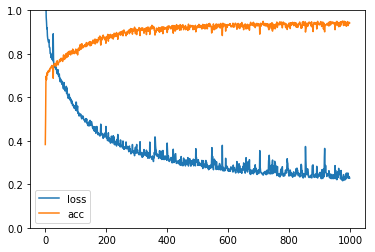

In [11]:
#Loss Accuracy
historydf=pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))

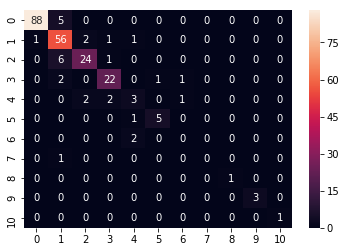

In [12]:
#confusion matrix
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test_class, y_pred_class))
sn.heatmap(df_cm, annot=True)

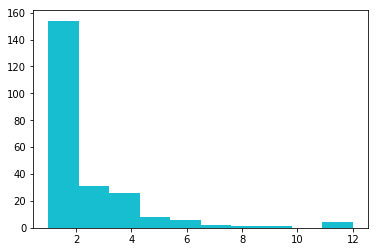

In [13]:
i=0
cm2=pd.DataFrame()
for j in range(len(plt.hist(y_test_class)[0])):
       if plt.hist(y_test_class)[0][j]>0:
            cm2[i]=cm[i]/plt.hist(y_test_class)[0][j]
            i=i+1

cm_final=np.round(np.transpose(cm2),2)

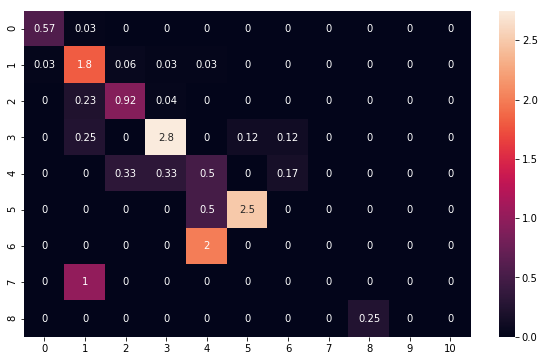

In [14]:
plt.subplots(figsize=(10,6))
sns.heatmap(cm_final, annot=True)

In [15]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

clf=RandomForestClassifier(n_estimators=500,max_features=4,max_depth=1000,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9055793991416309
